<a href="https://colab.research.google.com/github/devmoisesfront/Capacitaci-n-/blob/main/Ejercicio_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT # 3
Presentend  by Rafael Alviz


---

**In the dimension of excellence we conquer the future**





# **PUNTO A**
*Which variables are quantitative/numerical? Which are ordinal? Which are nominal?*

In [41]:
import pandas as pd
import seaborn as sns 
import tkinter.font as tk


df = pd.read_csv("Cereals.csv")
dtypes = df.dtypes
print("Quantitative;")
print(dtypes[(dtypes == "float64")])

print("Numerical Variables:")
print(dtypes[ (dtypes == "int64")])

print("Nominal Variables:")
print(dtypes[(dtypes == "object")])


Quantitative;
fiber     float64
carbo     float64
sugars    float64
potass    float64
weight    float64
cups      float64
rating    float64
dtype: object
Numerical Variables:
calories    int64
protein     int64
fat         int64
sodium      int64
vitamins    int64
shelf       int64
dtype: object
Nominal Variables:
name    object
mfr     object
type    object
dtype: object


# **PUNTO B**

*Compute the mean, median, min, max, and standard deviation for each of the quantitative
variables. This can be done using pandas as shown in Table*

In [25]:
import pandas as pd


df = pd.read_csv("Cereals.csv")


quant_vars = df.select_dtypes(include=["float64", "int64"])


print(quant_vars.describe())


         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   75.000000   77.000000  77.000000  77.000000  77.000000   
mean    7.026316   98.666667   28.246753   2.207792   1.029610   0.821039   
std     4.378656   70.410636   22.342523   0.832524   0.150477   0.232716  

# **PUNTO C**
*Plot a histogram for each of the quantitative variables. Based on the histograms and summary
statistics, answer the following questions:*

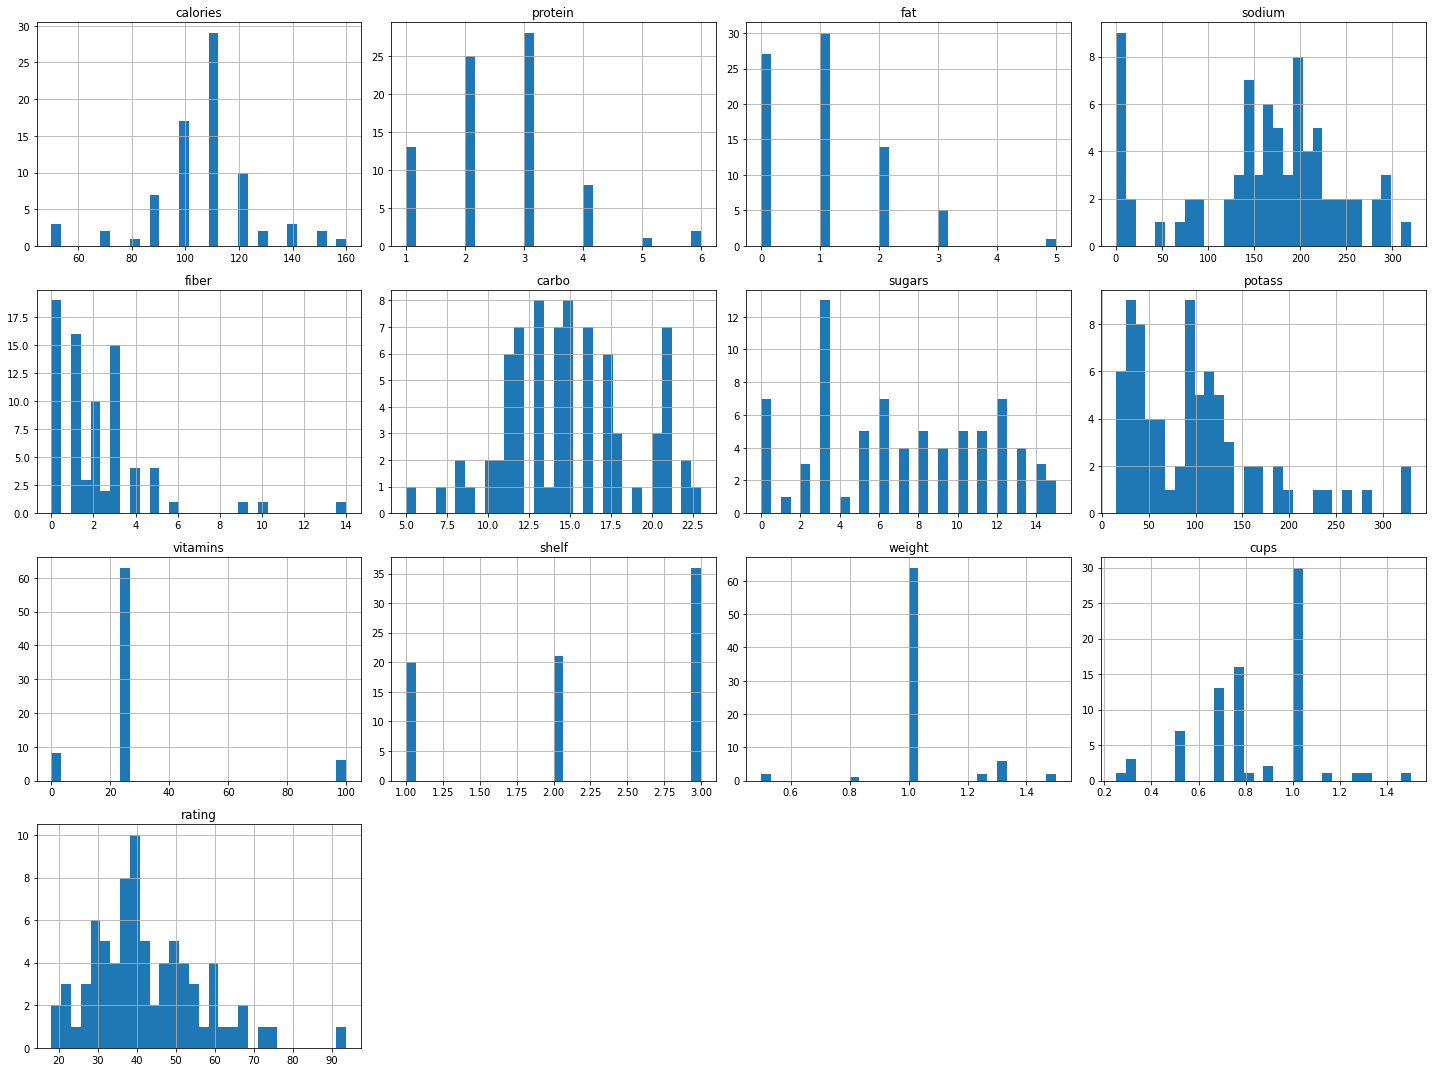

In [29]:
import matplotlib.pyplot as plt

quant_vars.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()


# **PUNTO C I**
*i. Which variables have the largest variability?*

In [30]:
import pandas as pd

df = pd.read_csv("Cereals.csv")
quant_vars = df.select_dtypes(include=["float64", "int64"])
summary = quant_vars.describe()
range = summary.loc["max"] - summary.loc["min"]
stddev = summary.loc["std"]
var_variability = pd.DataFrame({"Range": range, "Standard Deviation": stddev})
var_variability.sort_values(by="Range", ascending=False, inplace=True)
# or
print(var_variability.head())


               Range  Standard Deviation
sodium    320.000000           83.832295
potass    315.000000           70.410636
calories  110.000000           19.484119
vitamins  100.000000           22.342523
rating     75.662061           14.047289


# **PUNTO C II**
*ii.Which variables seem skewed?*

In [28]:
import pandas as pd


df = pd.read_csv("Cereals.csv")

quant_vars = df.select_dtypes(include=["float64", "int64"])

skewness = quant_vars.skew()

skewness.sort_values(ascending=False, inplace=True)

print(skewness[skewness > 1])


vitamins    2.463704
fiber       2.431675
potass      1.400355
fat         1.165989
dtype: float64


# **PUNTO F** I 
Compute the correlation table for the quantitative variable (method corr()). In addition,
generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn
library).
i. Which pair of variables is most strongly correlated? 

Most Strongly Correlated Pair: ('fiber', 'potass')


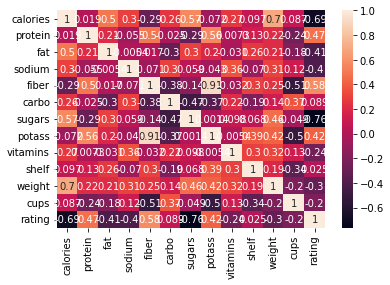

In [37]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("Cereals.csv")
quant_vars = df.select_dtypes(include=["float64", "int64"])
corr = quant_vars.corr()
sns.heatmap(corr, annot=True)
max_corr = corr.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr != 1]
print("Most Strongly Correlated Pair:", max_corr.index[0])
